# About notebook 

To merge all available mouse dataset for BBKNN paper

# Importing

## Modules

In [78]:
import numpy as np
import scipy as sp
import scanpy.api as sc
import pandas as pd
import matplotlib.pyplot as plt
from bbknn import bbknn

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=100)
sc.logging.print_version_and_date()

Running Scanpy 1.2.2 on 2018-07-20 15:48.


## Let's investigate data

### Here I'm loading 9 different mouse single cell datasets (preprocessed and merged into 1 AnnData object)

The objects can be downloaded from [ftp://ngs.sanger.ac.uk/production/teichmann/BBKNN/MouseAtlas.zip](ftp://ngs.sanger.ac.uk/production/teichmann/BBKNN/MouseAtlas.zip)

In [76]:
adata = sc.read("MouseAtlas.total")

Standard KNN. Lots of atlas-of-origin batch.

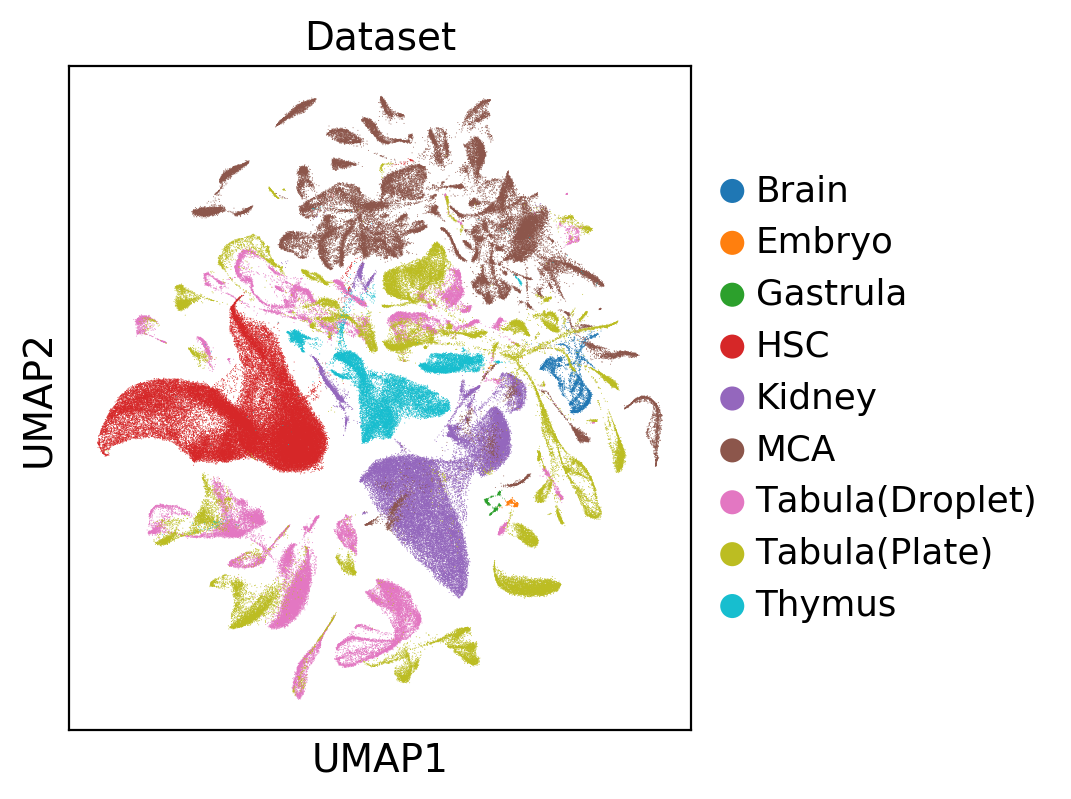

In [77]:
sc.pl.umap(adata,color='Dataset')

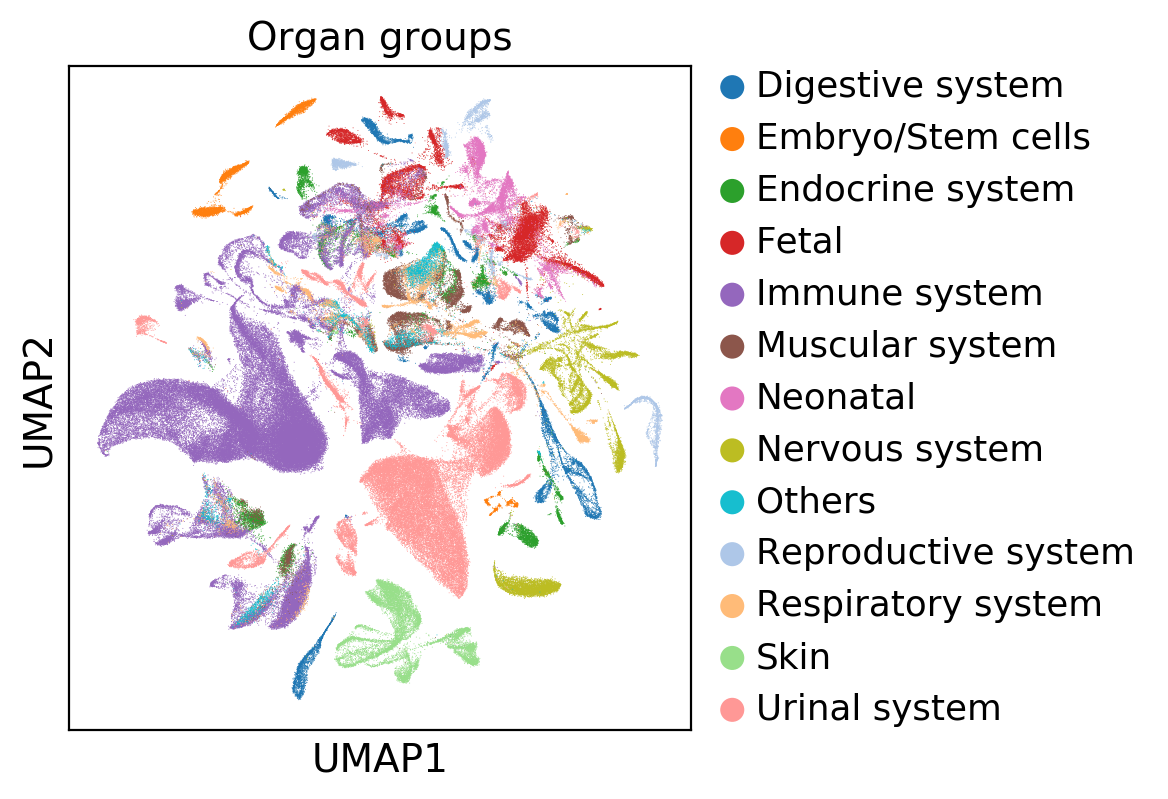

In [79]:
sc.pl.umap(adata,color='Organ groups')

Run BBKNN

In [10]:
bbknn(adata,batch_key='sample',trim=10000)

computing batch balanced neighbors
    finished (0:06:22.40) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [11]:
sc.tl.umap(adata)

computing UMAP
    finished (0:06:30.40) --> added
    'X_umap', UMAP coordinates (adata.obsm)


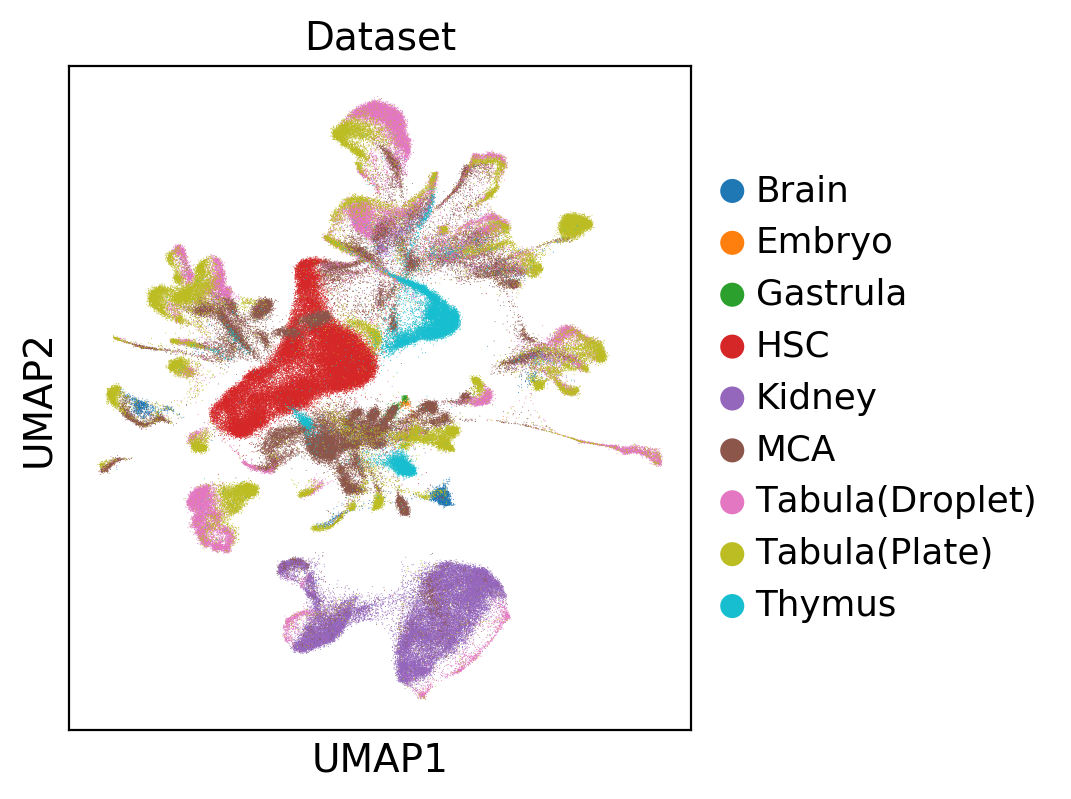

In [12]:
sc.pl.umap(adata,color='Dataset')

... storing 'Organ groups' as categorical


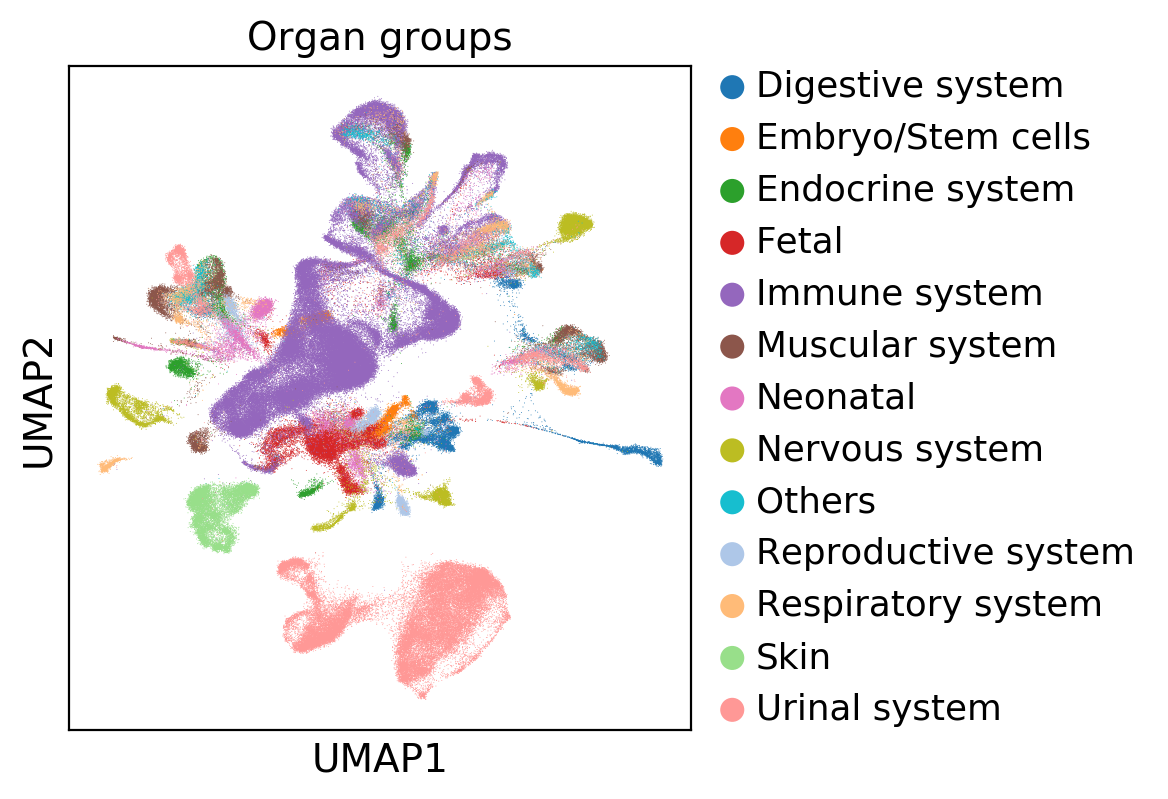

In [24]:
sc.pl.umap(adata,color='Organ groups')

## Read subsampled dataset

This dataset contains subsampled cells from above to create more numerically balanced populations

In [80]:
bdata = sc.read("MouseAtlas.subset")

Let's see how it looks before we apply bbknn

In [17]:
sc.pp.neighbors(bdata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:01:53.03) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [18]:
sc.tl.umap(bdata)

computing UMAP
    finished (0:02:25.33) --> added
    'X_umap', UMAP coordinates (adata.obsm)


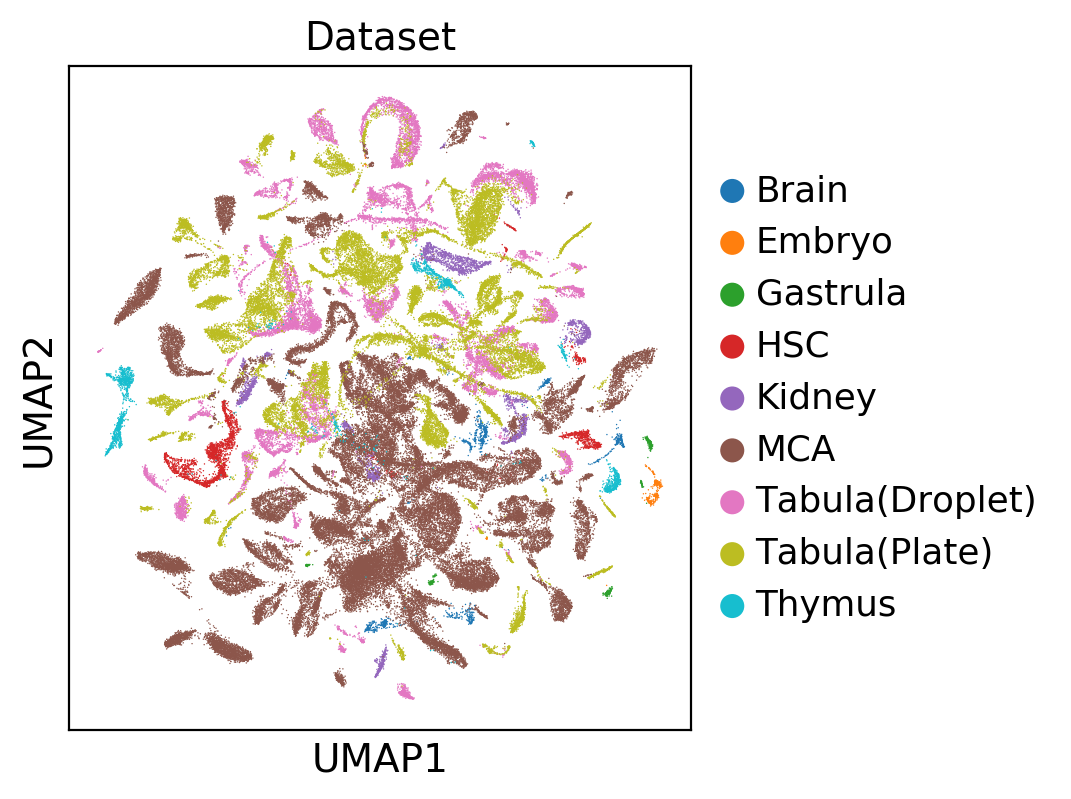

In [25]:
sc.pl.umap(bdata,color='Dataset')

In [26]:
bbknn(bdata,batch_key='sample',trim=10000)

computing batch balanced neighbors
    finished (0:02:02.51) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [27]:
sc.tl.umap(bdata)

computing UMAP
    finished (0:02:42.40) --> added
    'X_umap', UMAP coordinates (adata.obsm)


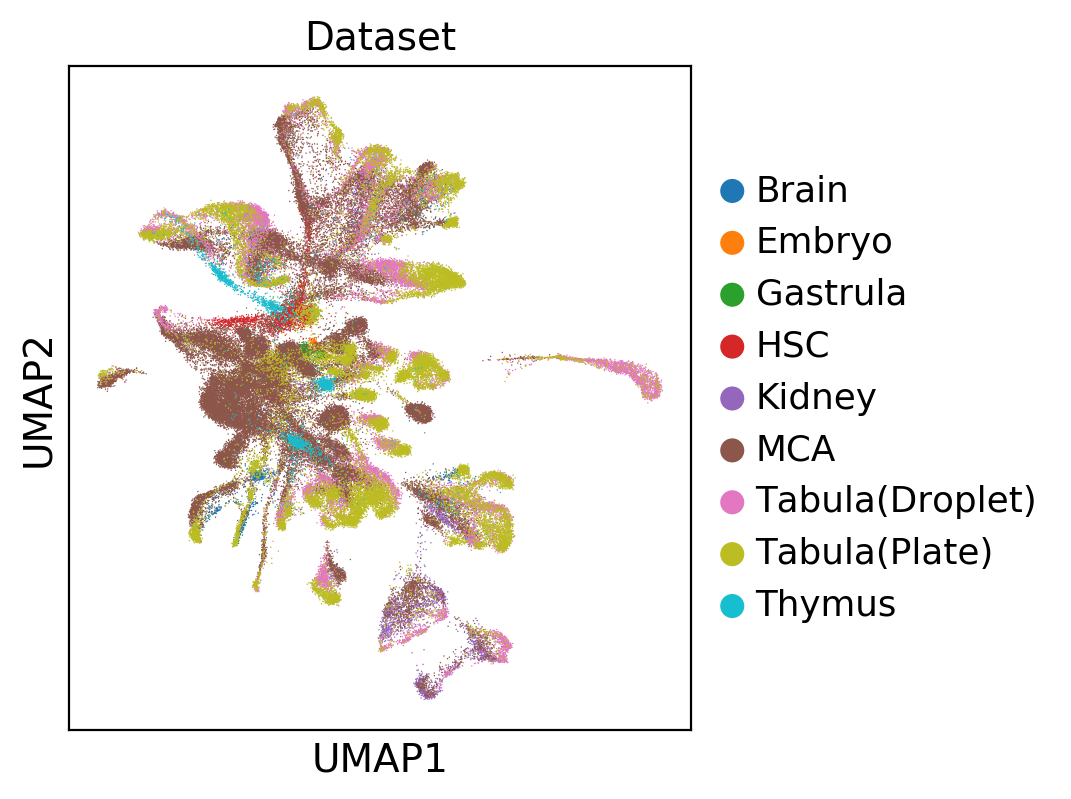

In [28]:
sc.pl.umap(bdata, color='Dataset')

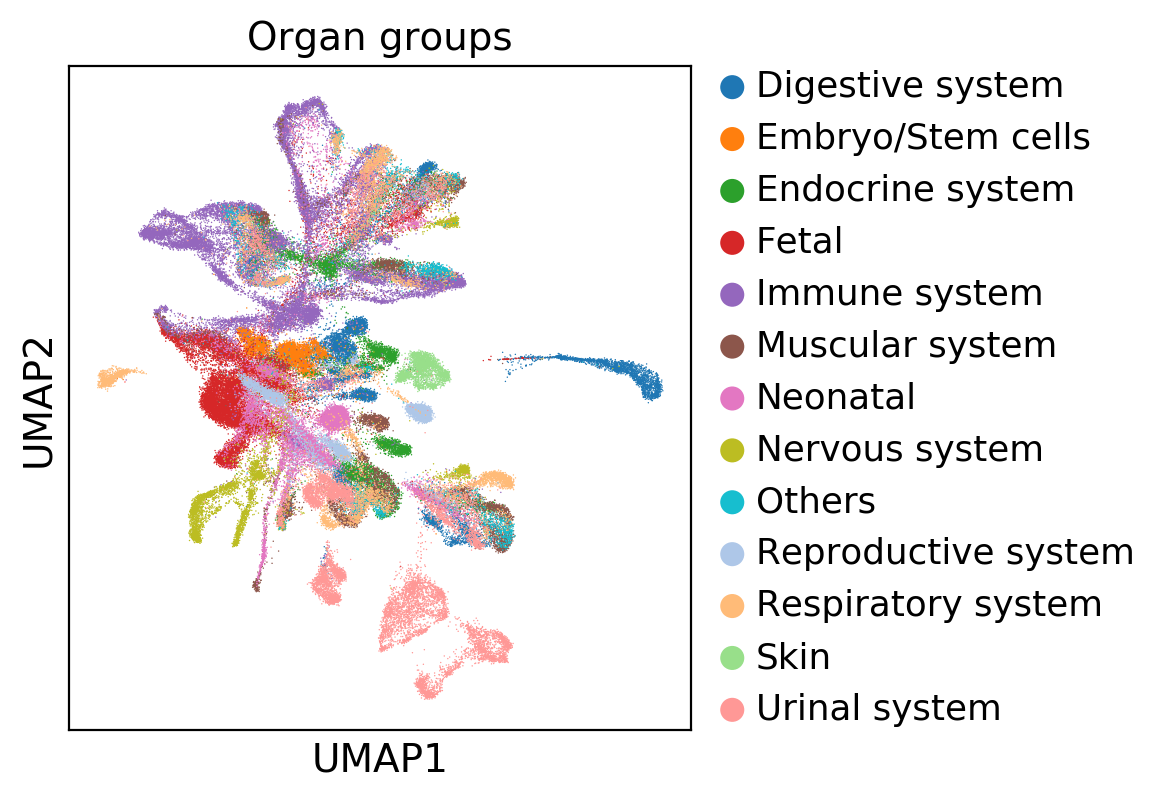

In [29]:
sc.pl.umap(bdata, color='Organ groups')

... storing 'Cell types' as categorical


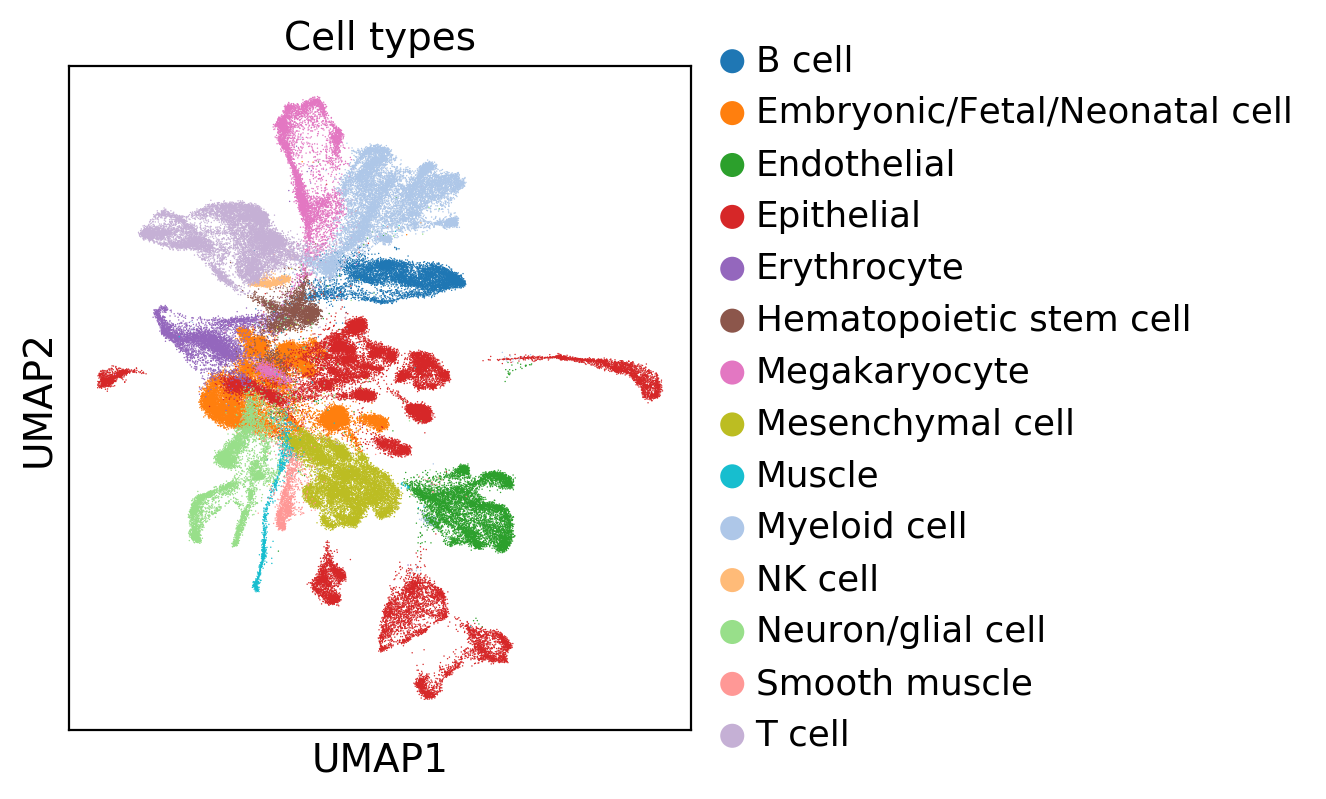

In [37]:
sc.pl.umap(bdata, color='Cell types')

These are marker genes we used to annotate cell types

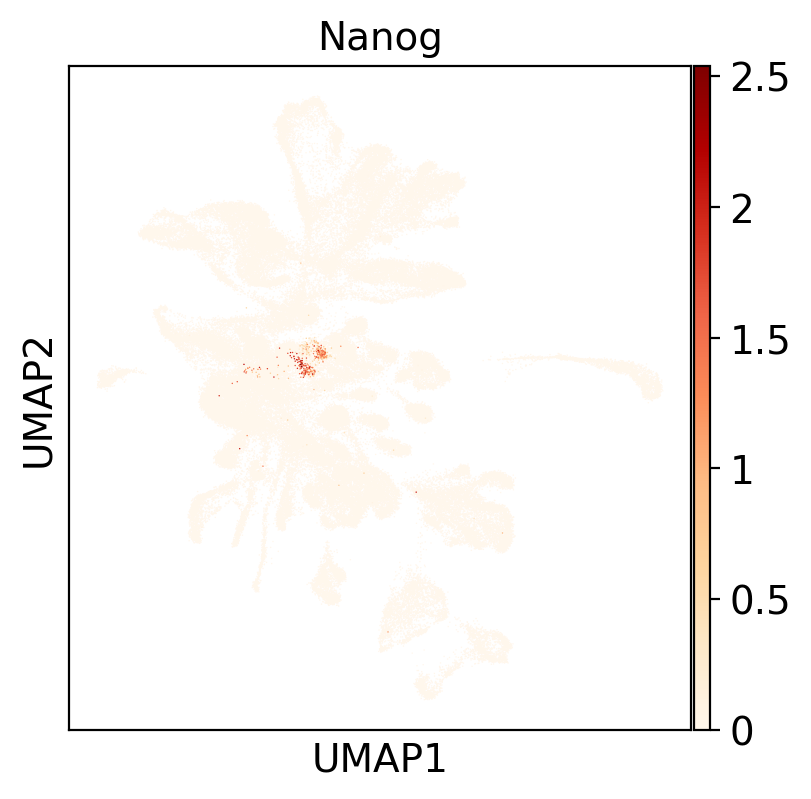

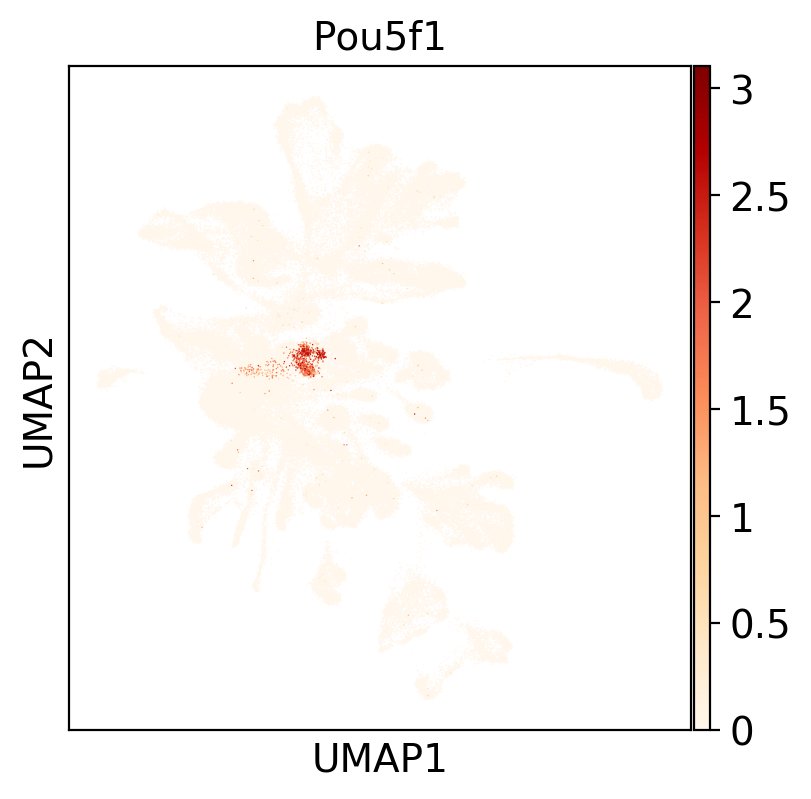

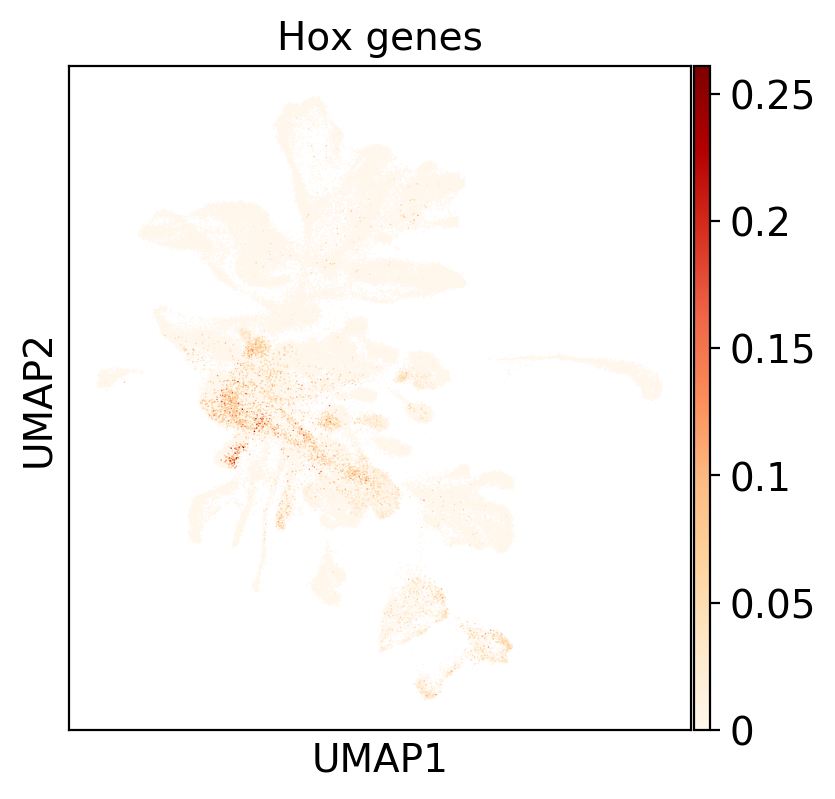

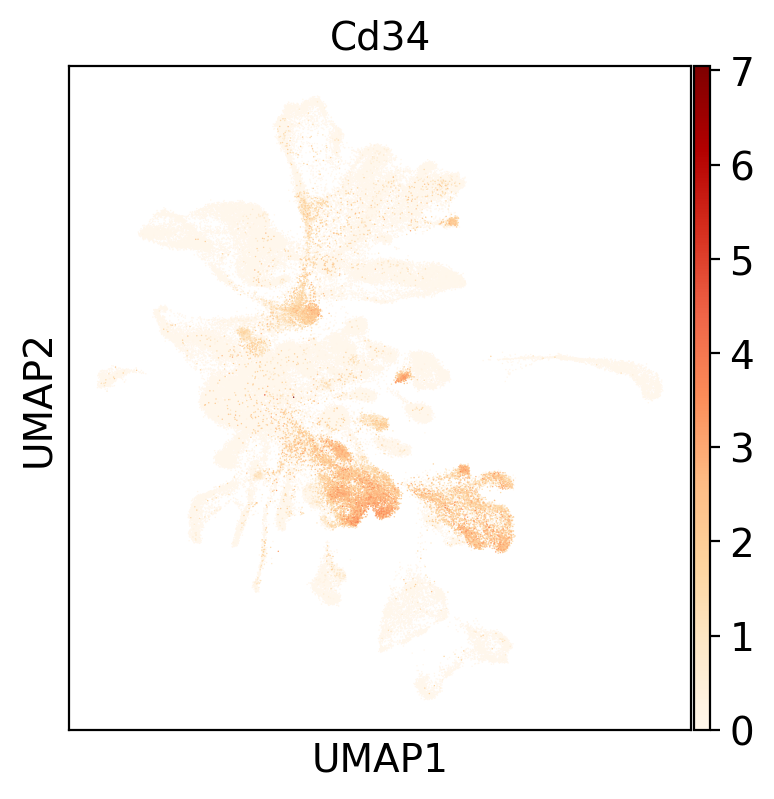

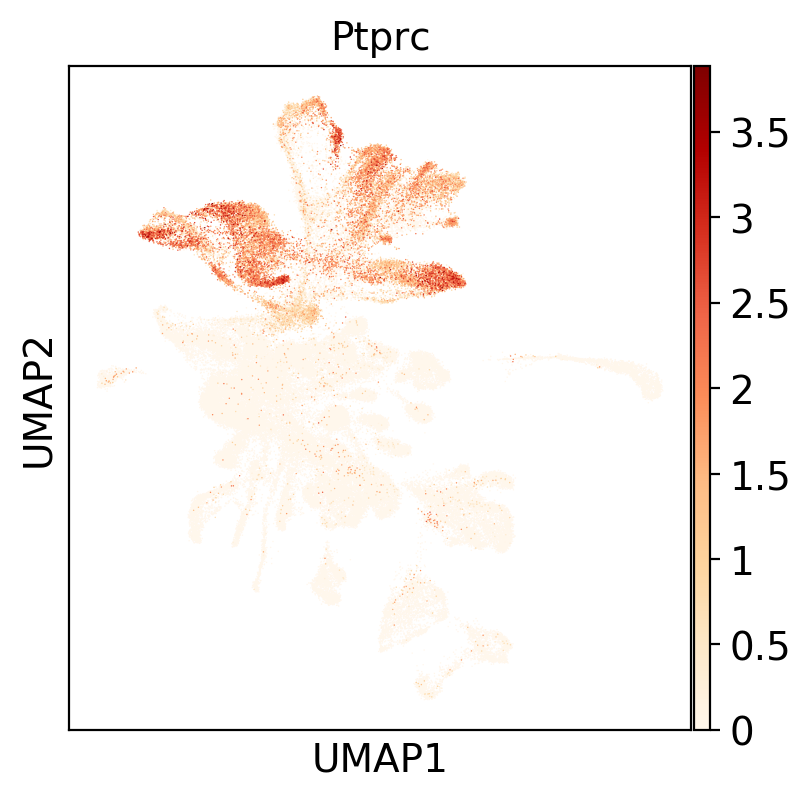

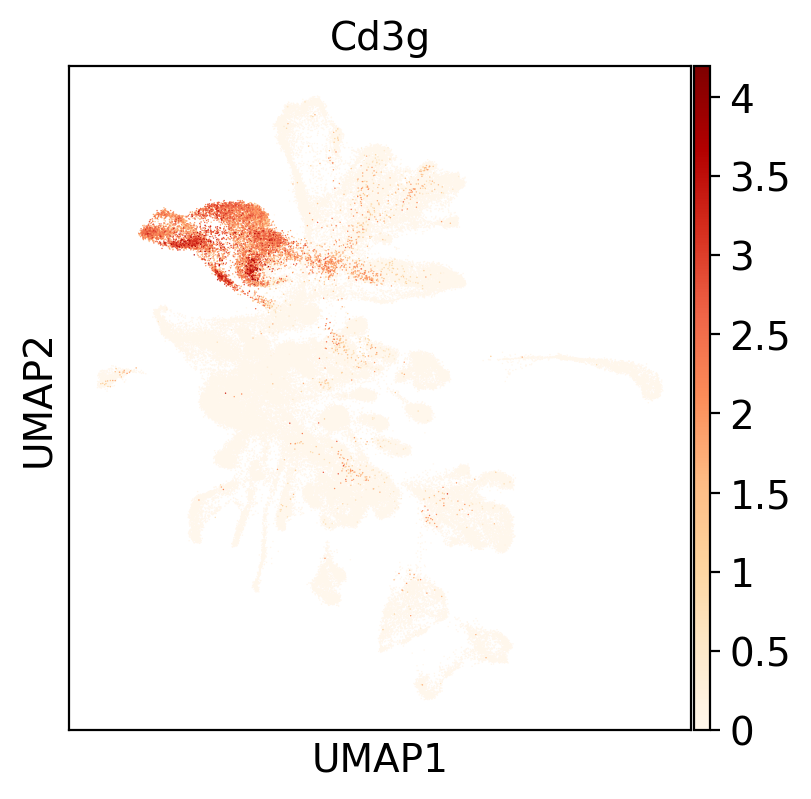

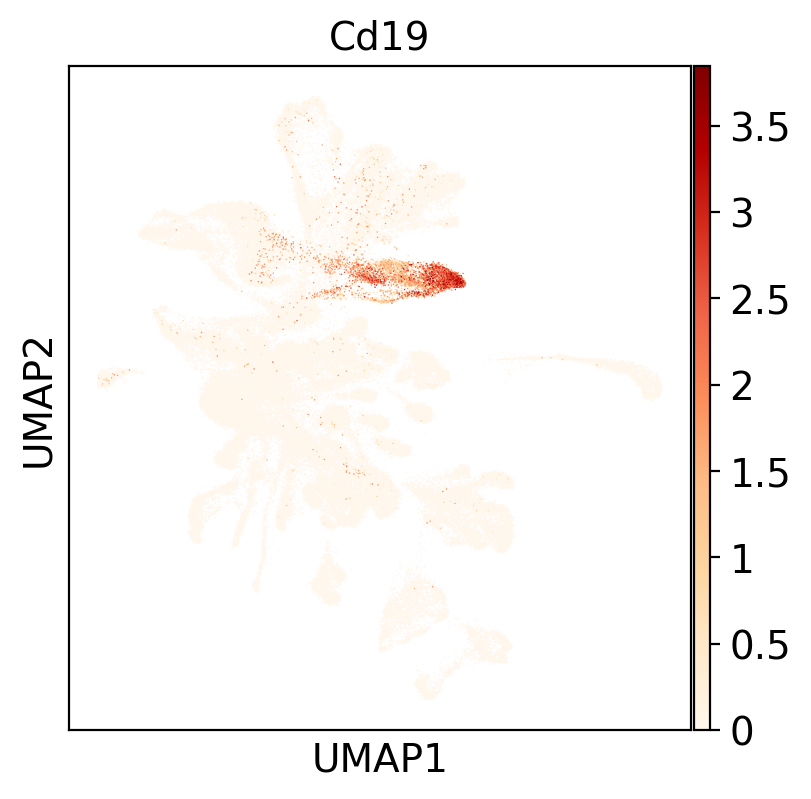

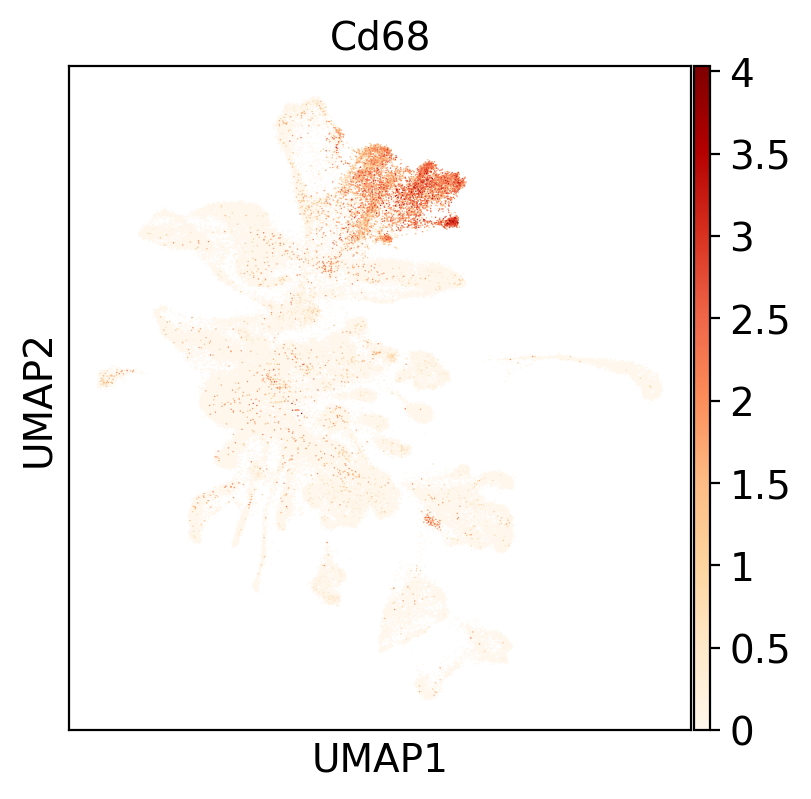

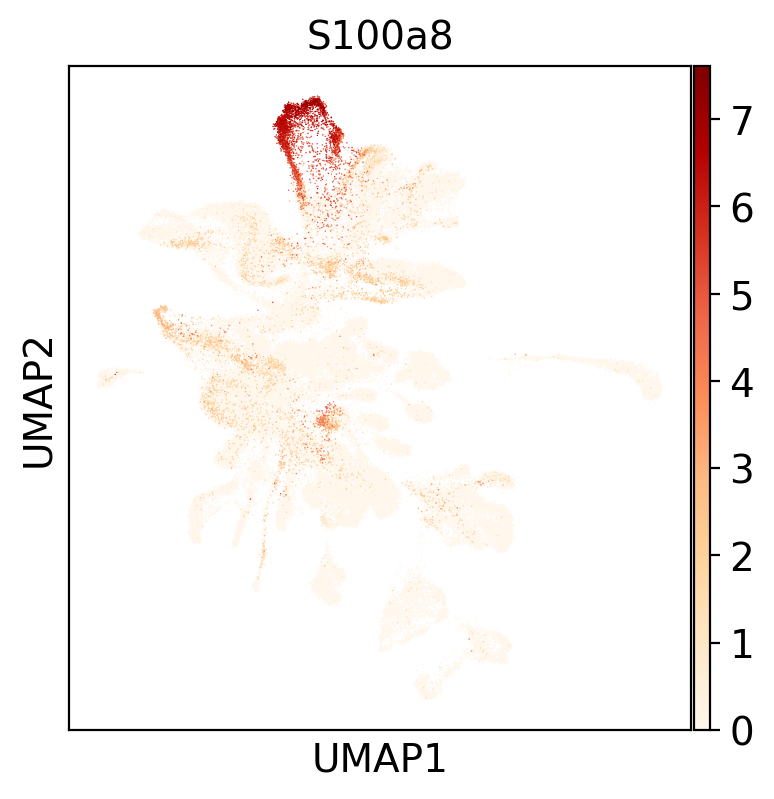

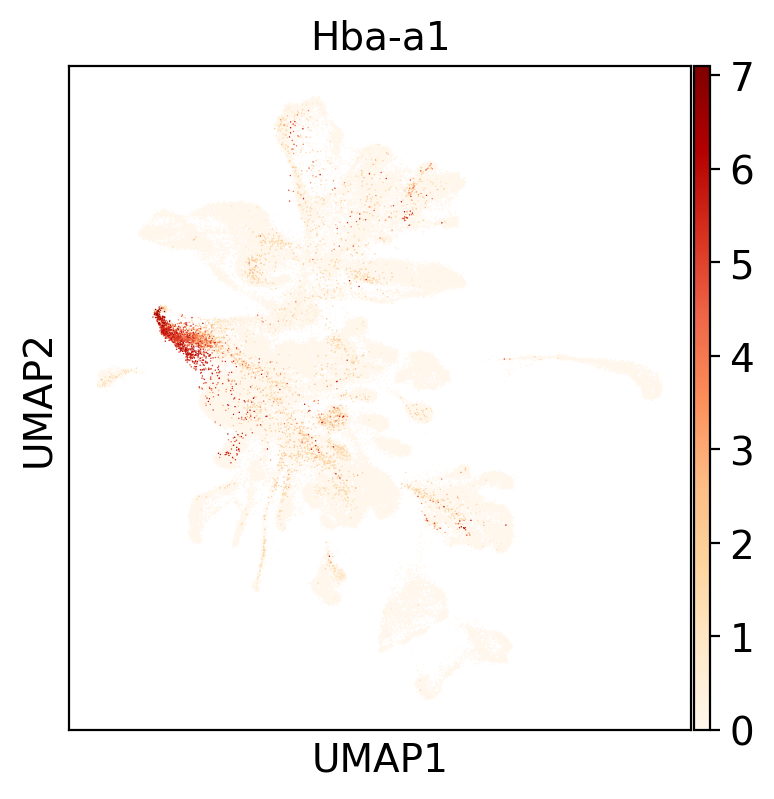

In [50]:
for gene in ["Nanog","Pou5f1","Hox_genes","Cd34","Ptprc","Cd3g","Cd19","Cd68","S100a8","Hba-a1"]:
    sc.pl.umap(bdata,color=gene,color_map='OrRd')

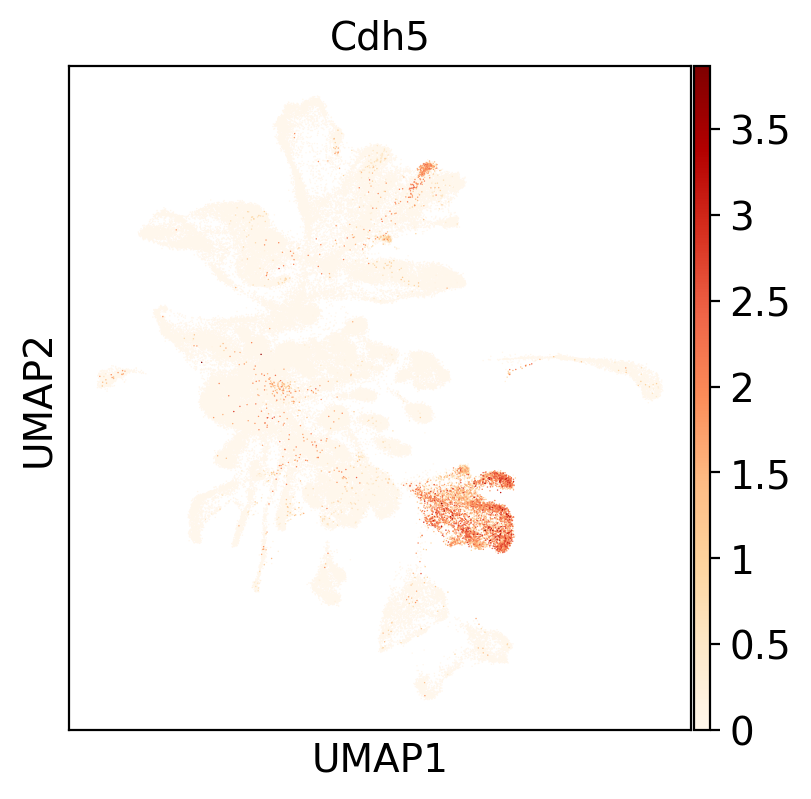

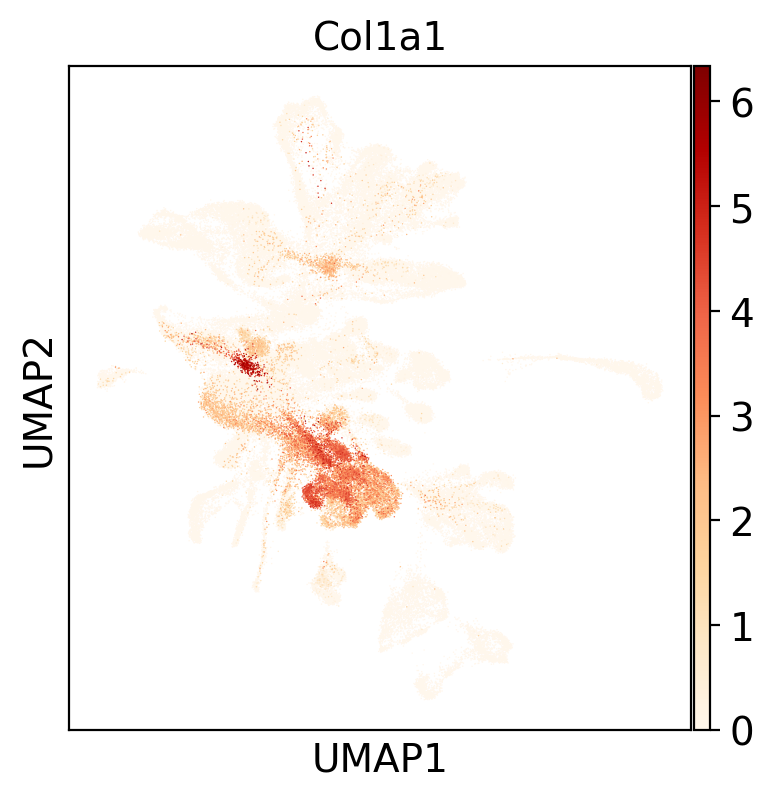

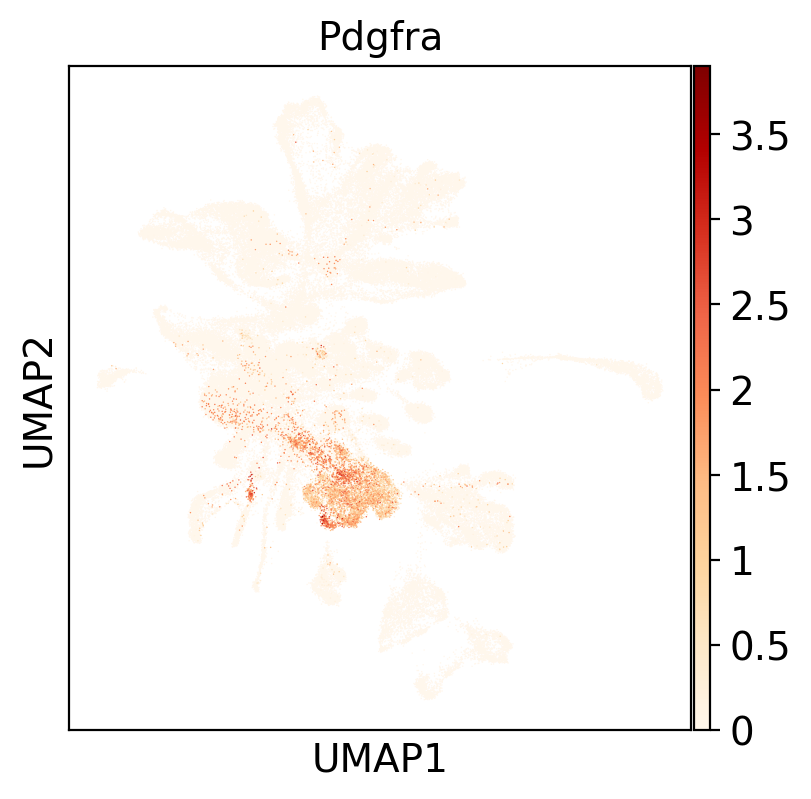

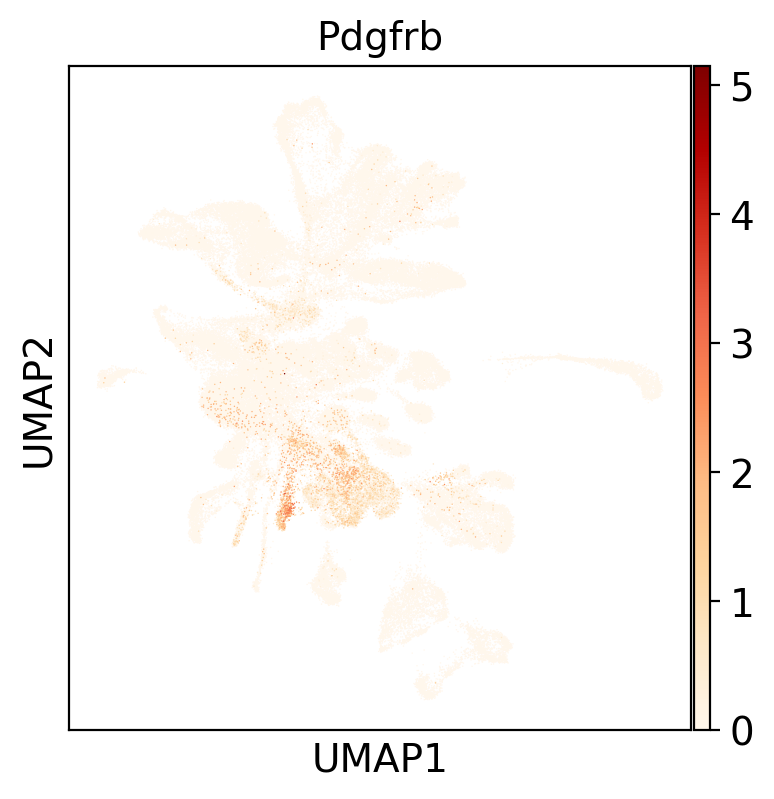

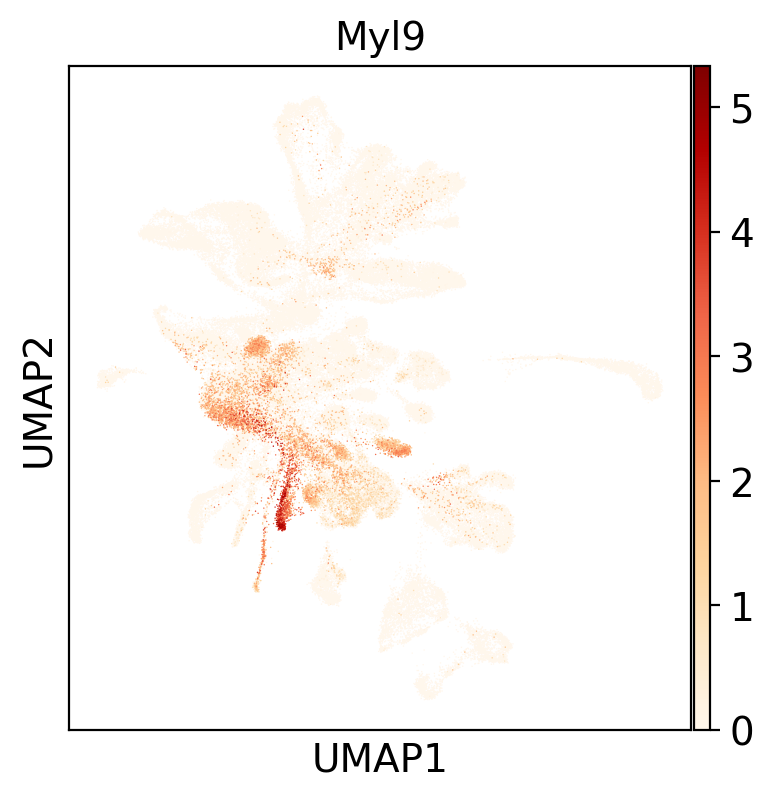

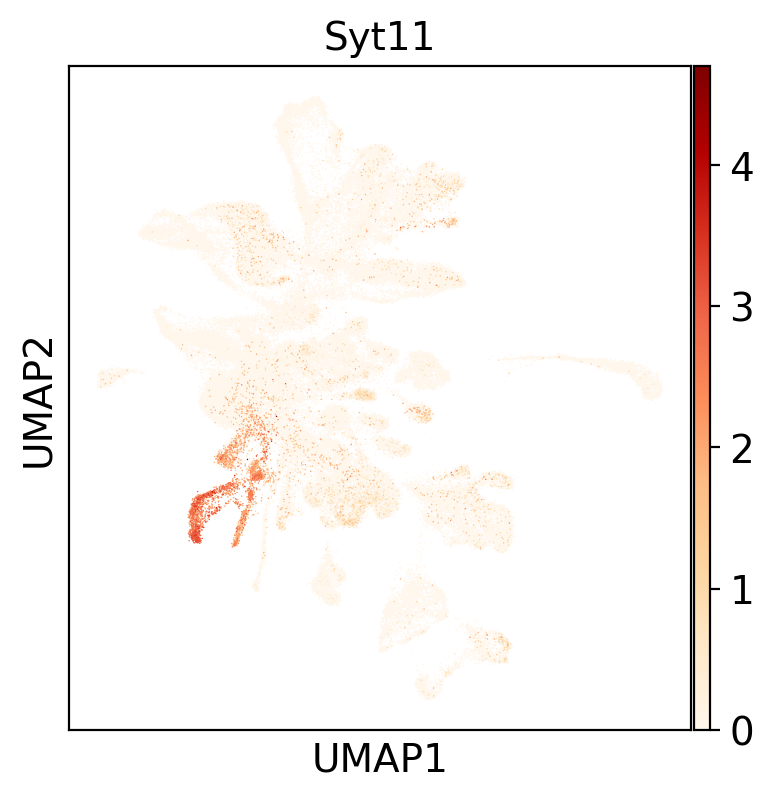

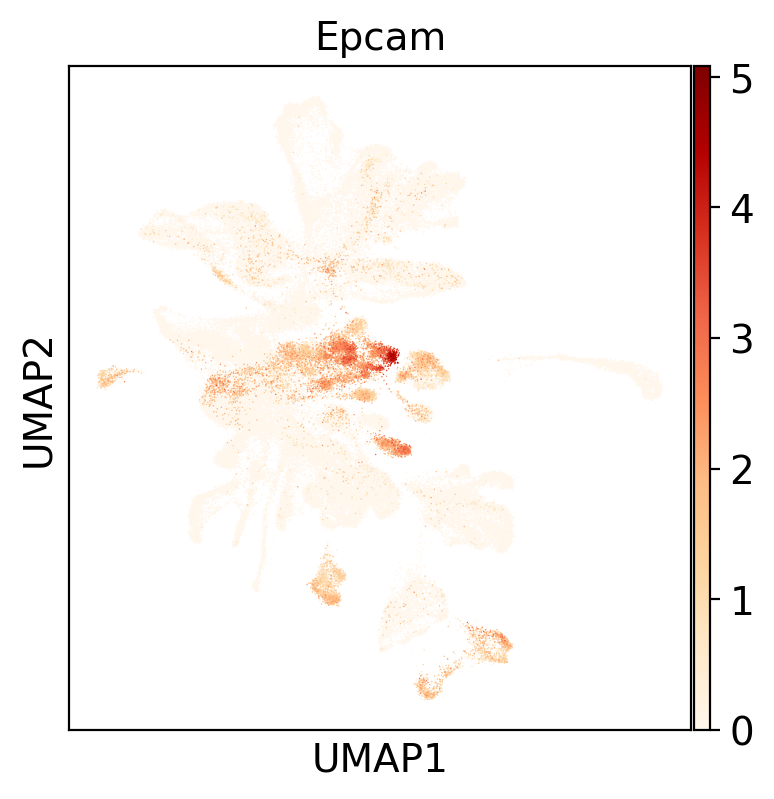

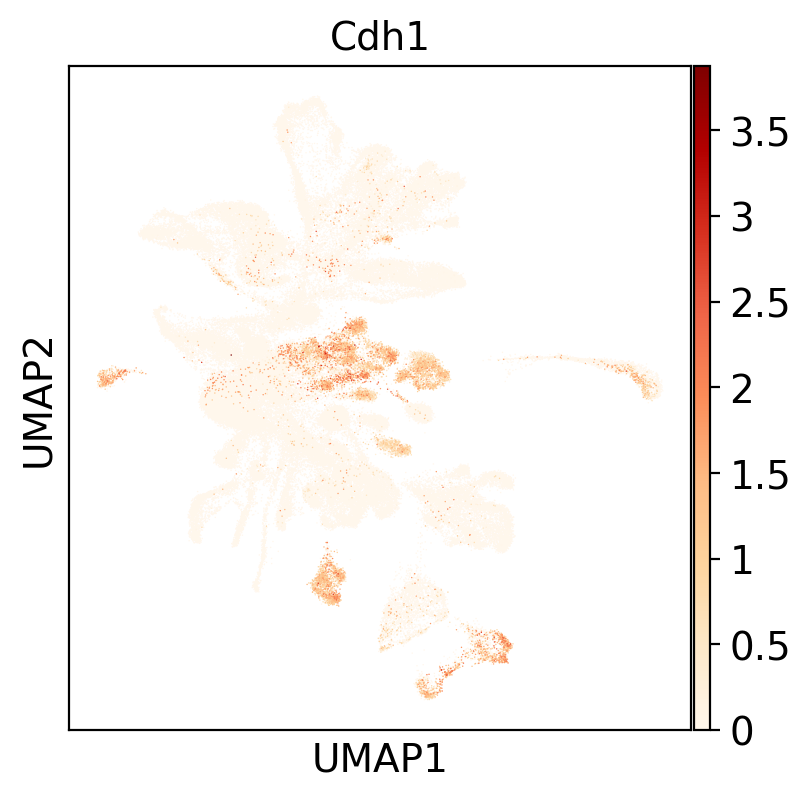

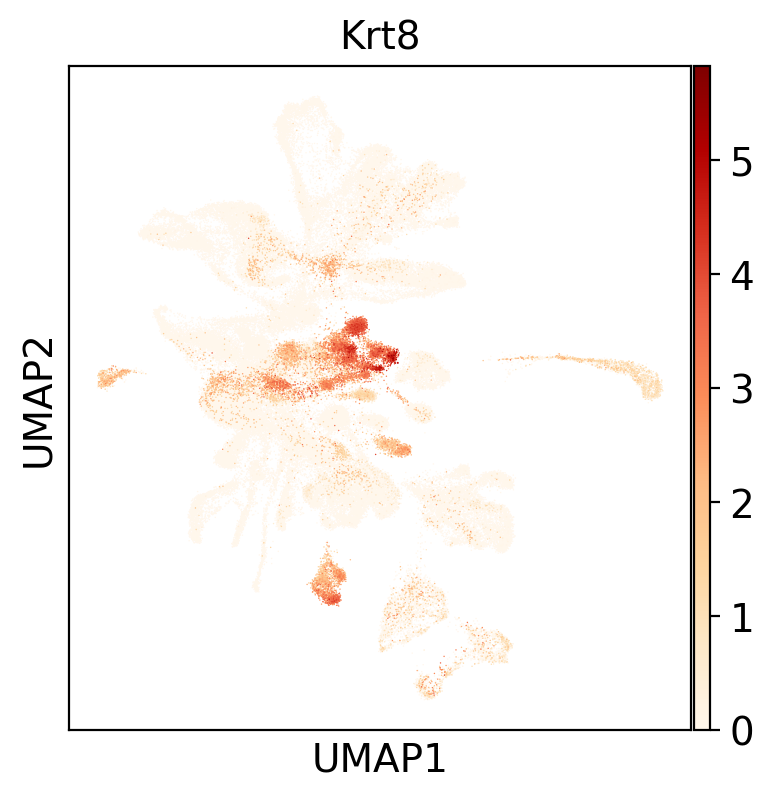

In [53]:
for gene in ["Cdh5","Col1a1","Pdgfra","Pdgfrb","Myl9","Syt11","Epcam","Cdh1","Krt8"]:
    sc.pl.umap(bdata,color=gene,color_map='OrRd')